YOLOv5  2024-11-3 Python-3.12.3 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)



Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
c:\Users\Lione\Desktop\APS360\APS360_Project\yolov5\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


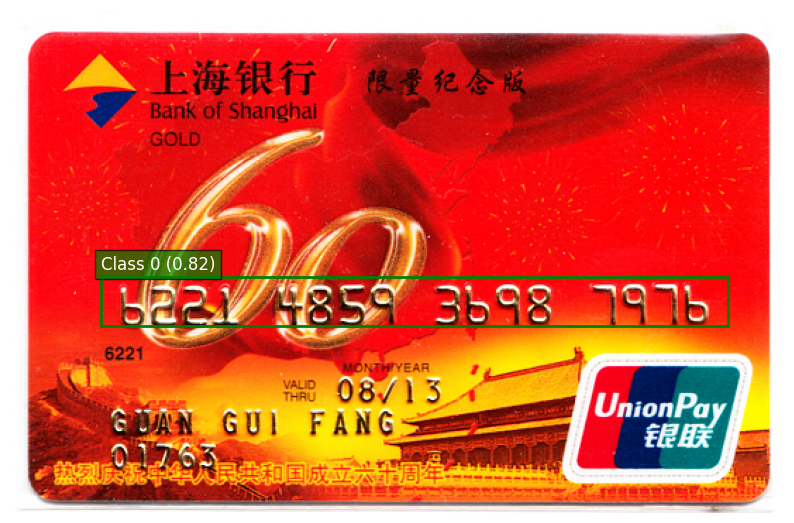

c:\Users\Lione\Desktop\APS360\APS360_Project\yolov5\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


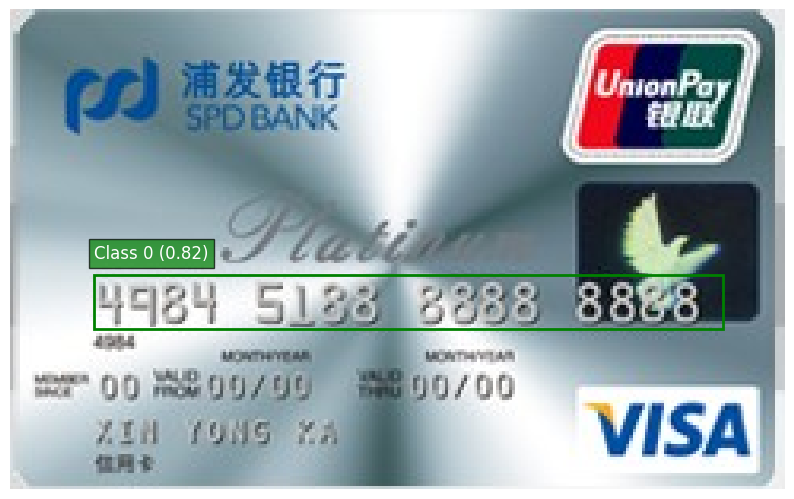

c:\Users\Lione\Desktop\APS360\APS360_Project\yolov5\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


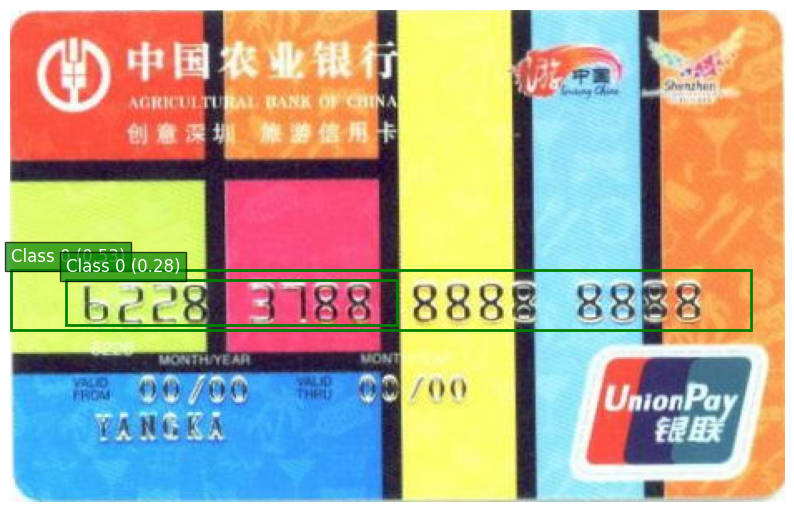

c:\Users\Lione\Desktop\APS360\APS360_Project\yolov5\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


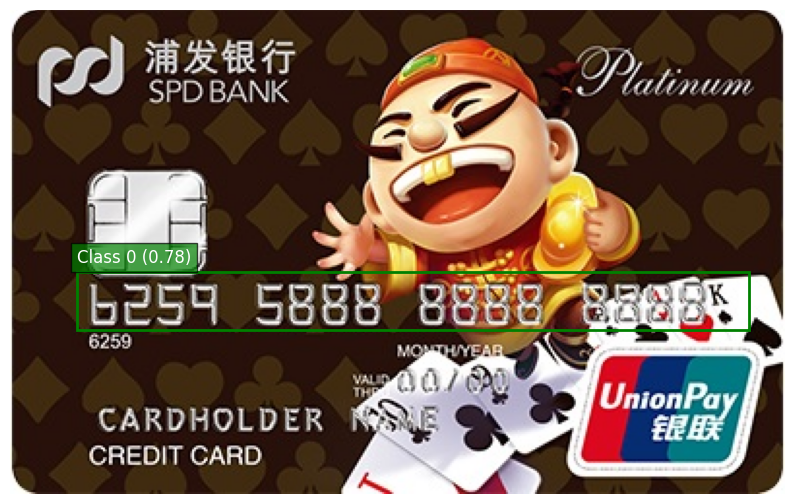

c:\Users\Lione\Desktop\APS360\APS360_Project\yolov5\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


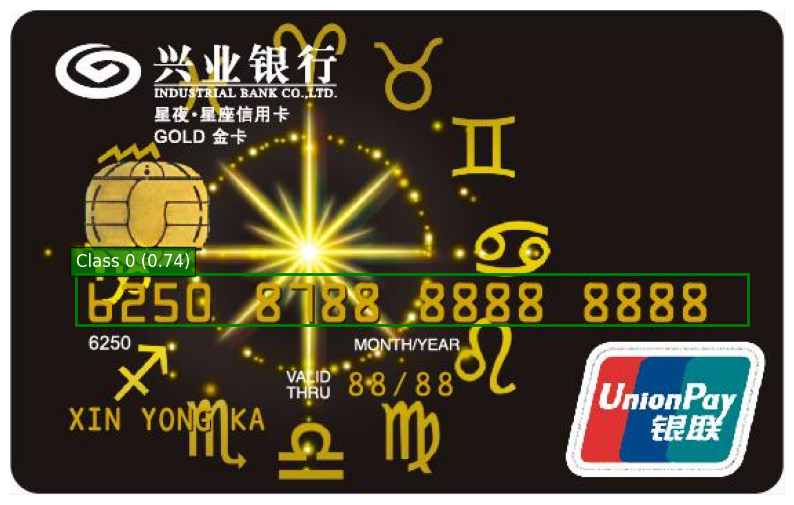

c:\Users\Lione\Desktop\APS360\APS360_Project\yolov5\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


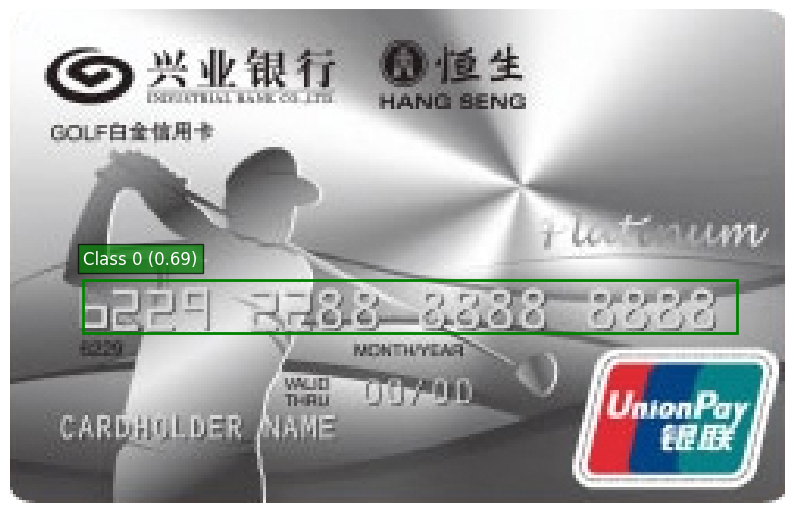

c:\Users\Lione\Desktop\APS360\APS360_Project\yolov5\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


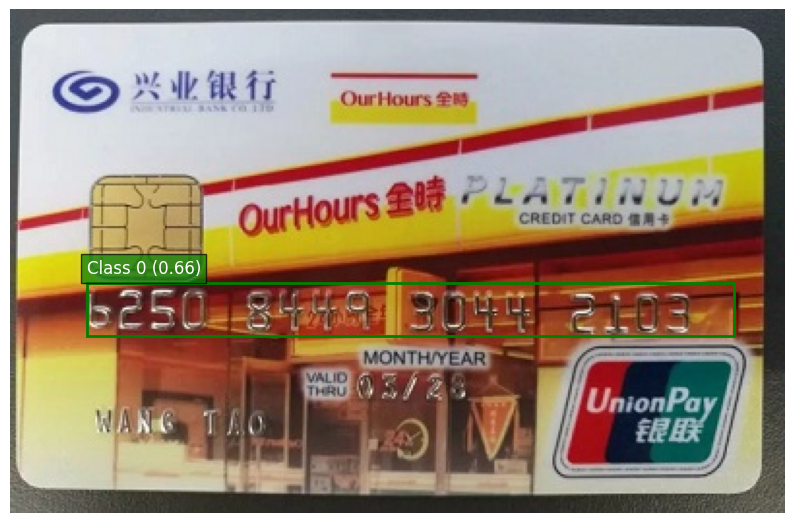

c:\Users\Lione\Desktop\APS360\APS360_Project\yolov5\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


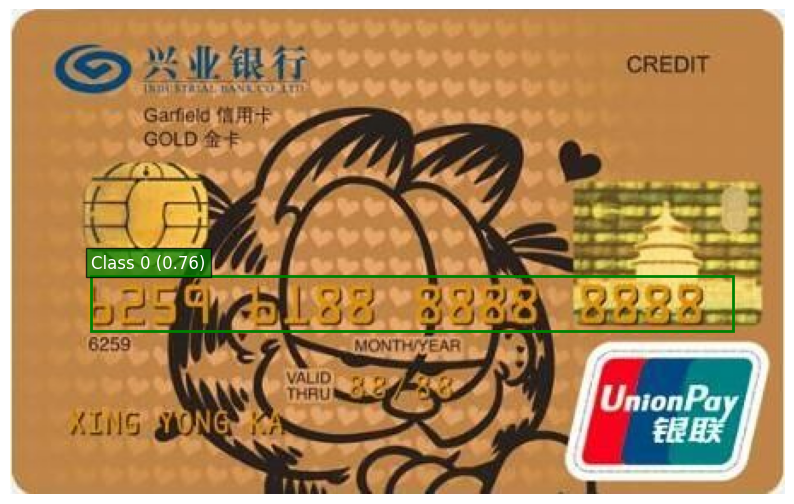

c:\Users\Lione\Desktop\APS360\APS360_Project\yolov5\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


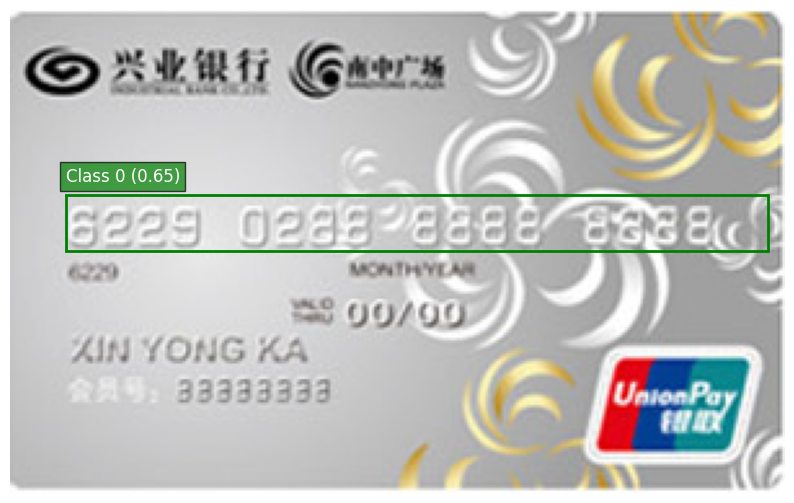

c:\Users\Lione\Desktop\APS360\APS360_Project\yolov5\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


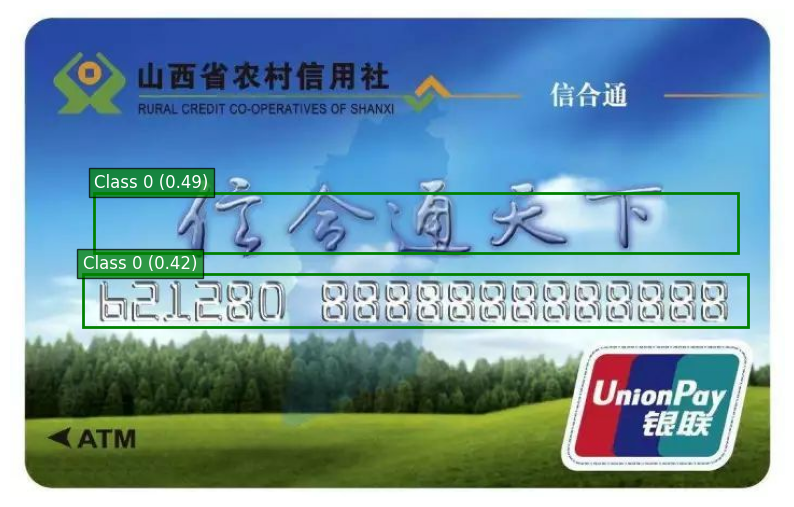

c:\Users\Lione\Desktop\APS360\APS360_Project\yolov5\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


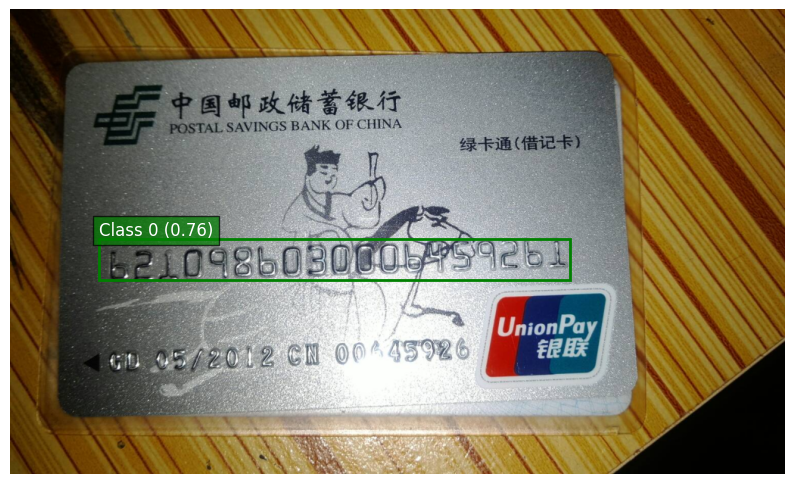

c:\Users\Lione\Desktop\APS360\APS360_Project\yolov5\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


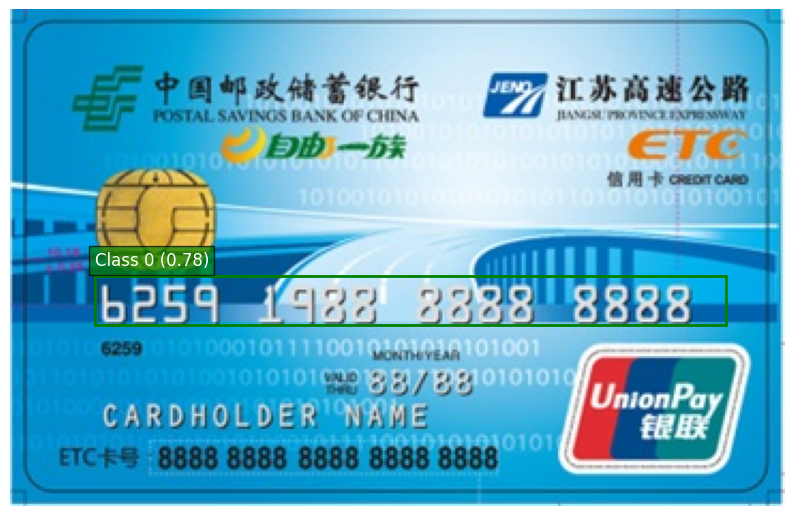

c:\Users\Lione\Desktop\APS360\APS360_Project\yolov5\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


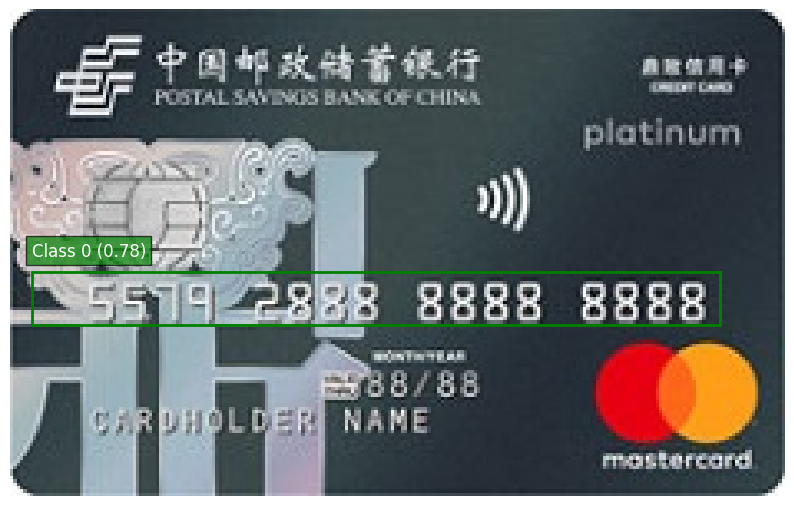

c:\Users\Lione\Desktop\APS360\APS360_Project\yolov5\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


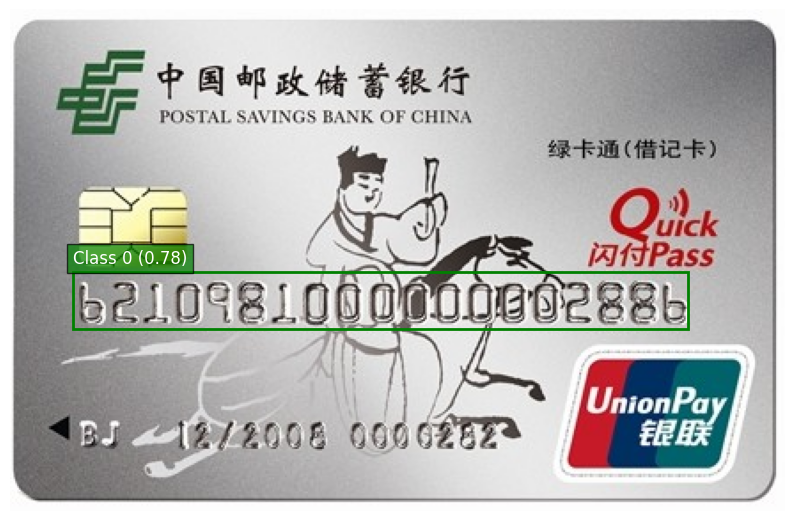

c:\Users\Lione\Desktop\APS360\APS360_Project\yolov5\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


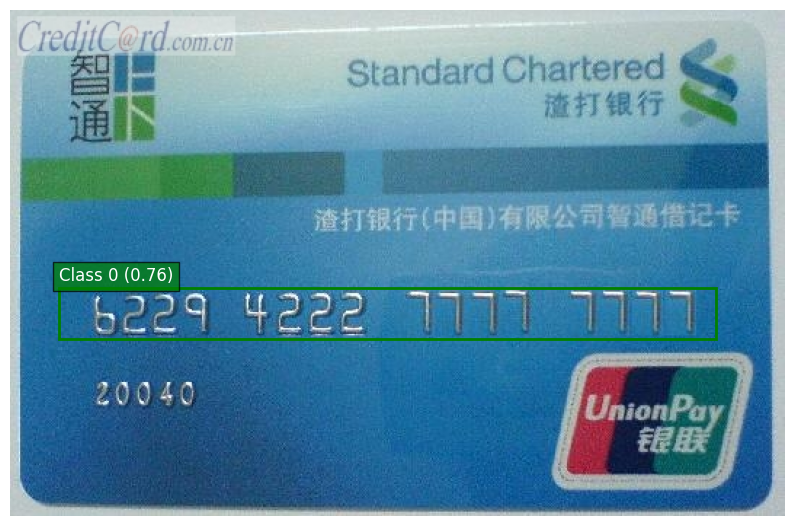

c:\Users\Lione\Desktop\APS360\APS360_Project\yolov5\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


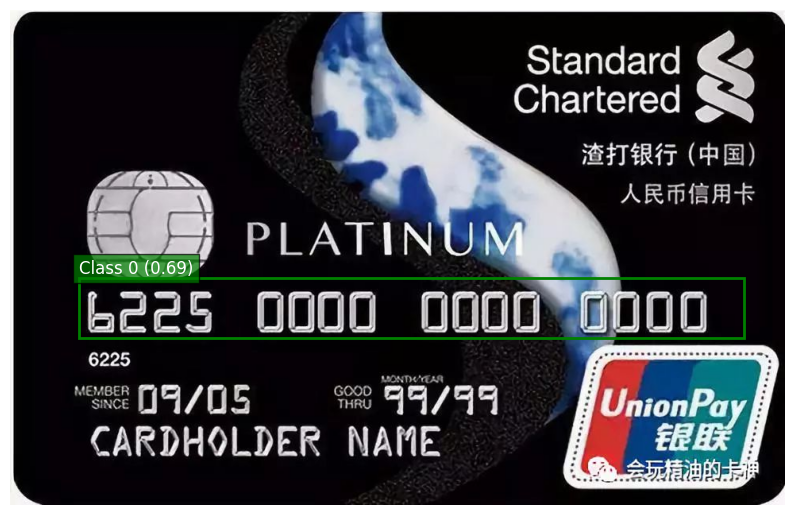

In [3]:
import os
import cv2
import torch
import matplotlib.pyplot as plt
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
# Function to load and preprocess an image
def load_image(image_path, max_size=1024):
    if not os.path.exists(image_path):
        return None
    image = cv2.imread(image_path)
    if image is None:
        return None
    # Resize image if too large
    h, w, _ = image.shape
    if max(h, w) > max_size:
        scale = max_size / max(h, w)
        image = cv2.resize(image, (int(w * scale), int(h * scale)), interpolation=cv2.INTER_AREA)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Function to visualize YOLO results
def plot_yolo_results(image, results):
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis("off")

    h, w, _ = image.shape
    
    for detection in results.xyxy[0]:
        x1, y1, x2, y2, confidence, cls = detection.tolist()
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        confidence = round(confidence, 2)
        
        # Calculate box width and apply expansion
        box_width = x2 - x1
        expand_amount = int(box_width * 0.05)
        
        # Adjust box coordinates
        x1 = max(0, x1 - expand_amount)  # Ensure not beyond image boundary
        x2 = min(w, x2 + expand_amount)
        
        plt.gca().add_patch(
            plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor="green", linewidth=2)
        )
        label = f"Class {int(cls)} ({confidence})"
        plt.text(x1, y1 - 5, label, color="white", fontsize=12, bbox=dict(facecolor="green", alpha=0.7))

    %matplotlib inline
    plt.show()  # Use this explicitly if running as a script


# Path to images
image_dir = "APS360_Project_Dataset/dataset2/images/test"  # Replace with your image directory
weights_path = 'yolov5/runs/train/card_number_detector_win2/weights/best.pt'

# Load YOLO model
yolo_model = torch.hub.load('yolov5', 'custom', path=weights_path, source='local')
yolo_model = yolo_model.to('cpu')  # Force to CPU if GPU memory is limited

# Loop through images
for i in range(10, 100):
    image_path = os.path.join(image_dir, f"{i}.jpg")
    image = load_image(image_path)
    if image is None:
        continue  # Skip if file not found or image cannot be loaded

    # Run YOLO inference
    results = yolo_model(image)

    # Plot results
    plot_yolo_results(image, results)
